In [1]:
from DFTDataFrame.Tools import (
    create_frame,
    get_pathtofile,
    read_strucfile,
    update,
    get_project_root,
    get_zpe_entropies,
    Frequency,
    Imaginary,
    converged,
    notconverged,
)

from sympy import Symbol
from os import path as ospath
from ase import Atoms


# from DFTDataFrame.Tools import lines_that_start_with

# from DFTDataFrame.Tools import get_zpe
from DFTDataFrame.Tools import get_entropies
from DFTDataFrame.Tools import Atommultiindex
from DFTDataFrame.Tools import gas_free_G
from DFTDataFrame.Tools import ads_free_G

from pandas import DataFrame
from numpy import NaN
import pandas as pd
from numpy import round
import logging

In [2]:
# Creating a dataframe from a given directory and its subdirectories.
# The Flag file is the file inidicating in which folders it should look for. 
# Calc_file is read by ase.read to an Atoms object and reading all information from.

root=get_project_root()
Cu_slabs = create_frame(root+'/../tests/test_data/Cu/slabs/', calc_file='final.traj', flag_file='final.traj')
Cu_bulk = create_frame(root+'/../tests/test_data/Cu/bulk/', calc_file='final.traj', flag_file='final.traj')
Gas = create_frame(root+'/../tests/test_data/Gas/', calc_file='final.traj', flag_file='final.traj')


CRITICAL:root:/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/zeroAtoms/final.traj energy could not be read


Found 8 folders in /Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/
Found 1 folders in /Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/bulk/
Found 3 folders in /Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Gas/


In [3]:
# The DataFrame has 12 columns
# Path: path to the folder, 
# Files: files in the folder, usefule to check if ACF.dat or DOSCAR is present
# the Name: name which is shorter and easier to remember than the Path,
# E: the final energy
# struc: the atoms object of the final structure.
# fmax: the forces
# timestamp: the last modified date, used to update only what is necessary the frame 
# a,b,c, gamma: a,b,c and gamma of the unit cell
# Formula: the chemical formula of the structures
Cu_slabs

,Path,Name,files,E,struc,fmax,timestamp,a,b,c,gamma,Formula
100-clean-2x2x4,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4,"[final.traj, CO, ACF.dat, CONTCAR, O, H, OH]",-5.510428,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0081,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16
100-clean-2x2x4-CO,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-CO,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-18.173690,"(Atom('Cu', [1.8956307871401654, 1.99563078714...",0.0064,1.710783e+09,5.182523,5.182523,21.496896,90.0,CCu16O
100-clean-2x2x4-O,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-O,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-10.682109,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0069,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16O
100-clean-2x2x4-H,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-H,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-8.968309,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0073,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16
100-clean-2x2x4-OH-complete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-complete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-incomplete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-incomplete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698505e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-missmatch,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-missmatch,"[final.traj, CONTCAR]",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698506e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-zeroAtoms,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-zeroAtoms,"[out.txt, final.traj, CONTCAR]",0.000000,(),0.0000,1.698506e+09,0.000000,0.000000,0.000000,0.0,0


## To update the frame with additional calculations, renamed or removed folders call update:

In [4]:
update(Cu_slabs, root+'/tests/test_data/Cu/slabs/', flag_file='final.traj')

No final.traj found in  /Users/dk2994/Desktop/git/DFTDataFrame/src/tests/test_data/Cu/slabs/
pathstoupdate %s 0


,Path,Name,files,E,struc,fmax,timestamp,a,b,c,gamma,Formula
100-clean-2x2x4,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4,"[final.traj, CO, ACF.dat, CONTCAR, O, H, OH]",-5.510428,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0081,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16
100-clean-2x2x4-CO,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-CO,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-18.173690,"(Atom('Cu', [1.8956307871401654, 1.99563078714...",0.0064,1.710783e+09,5.182523,5.182523,21.496896,90.0,CCu16O
100-clean-2x2x4-O,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-O,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-10.682109,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0069,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16O
100-clean-2x2x4-H,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-H,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-8.968309,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0073,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16
100-clean-2x2x4-OH-complete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-complete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-incomplete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-incomplete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698505e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-missmatch,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-missmatch,"[final.traj, CONTCAR]",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698506e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-zeroAtoms,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-zeroAtoms,"[out.txt, final.traj, CONTCAR]",0.000000,(),0.0000,1.698506e+09,0.000000,0.000000,0.000000,0.0,0


# A few tests

In [5]:
Cu_slabs[Cu_slabs.apply(lambda x: len(x.struc), axis=1) == 0] # shows rows which have 0 atoms


,Path,Name,files,E,struc,fmax,timestamp,a,b,c,gamma,Formula
100-clean-2x2x4-OH-zeroAtoms,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-zeroAtoms,"[out.txt, final.traj, CONTCAR]",0.0,(),0.0,1.698506e+09,0.0,0.0,0.0,0.0,0


In [6]:
notconverged(Cu_slabs, convergence_threshold=0.01) # shows Calculations which are not converged (force) or have forces exactly 0

,Path,Name,files,E,struc,fmax,timestamp,a,b,c,gamma,Formula
100-clean-2x2x4-OH-zeroAtoms,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-zeroAtoms,"[out.txt, final.traj, CONTCAR]",0.0,(),0.0,1.698506e+09,0.0,0.0,0.0,0.0,0


In [7]:
converged(Cu_slabs) #gives you only the force converged calculations

,Path,Name,files,E,struc,fmax,timestamp,a,b,c,gamma,Formula
100-clean-2x2x4,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4,"[final.traj, CO, ACF.dat, CONTCAR, O, H, OH]",-5.510428,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0081,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16
100-clean-2x2x4-CO,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-CO,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-18.173690,"(Atom('Cu', [1.8956307871401654, 1.99563078714...",0.0064,1.710783e+09,5.182523,5.182523,21.496896,90.0,CCu16O
100-clean-2x2x4-O,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-O,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-10.682109,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0069,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16O
100-clean-2x2x4-H,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-H,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-8.968309,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0073,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16
100-clean-2x2x4-OH-complete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-complete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-incomplete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-incomplete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698505e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-missmatch,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-missmatch,"[final.traj, CONTCAR]",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698506e+09,5.182523,5.182523,21.496896,90.0,HCu16O


## Filtering

In [8]:
#Not all calculations are always relevent. For example calculations in test folders can often be ignored.
#In this set we don't have any but if you would like to create a new frame with the filtered results assign it to a variable, possibly the same:
#Cu_slabs = Cu_slabs[~Cu_slabs.Name.str.contains('test')]
Cu_slabs[Cu_slabs.Name.str.contains('test')]


,Path,Name,files,E,struc,fmax,timestamp,a,b,c,gamma,Formula


In [9]:
# The ~ is a NOT operator here. So all entries that do NOT contains test are shown:
Cu_slabs[~Cu_slabs.Name.str.contains('test')]


,Path,Name,files,E,struc,fmax,timestamp,a,b,c,gamma,Formula
100-clean-2x2x4,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4,"[final.traj, CO, ACF.dat, CONTCAR, O, H, OH]",-5.510428,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0081,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16
100-clean-2x2x4-CO,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-CO,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-18.173690,"(Atom('Cu', [1.8956307871401654, 1.99563078714...",0.0064,1.710783e+09,5.182523,5.182523,21.496896,90.0,CCu16O
100-clean-2x2x4-O,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-O,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-10.682109,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0069,1.706996e+09,5.182523,5.182523,21.496896,90.0,Cu16O
100-clean-2x2x4-H,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-H,"[out.txt, final.traj, ACF.dat, CONTCAR, vib.eq...",-8.968309,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0073,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16
100-clean-2x2x4-OH-complete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-complete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.706996e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-incomplete,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-incomplete,"[vib.17y-.pckl, vib.17x+.pckl, vib.17z+.pckl, ...",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698505e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-missmatch,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-missmatch,"[final.traj, CONTCAR]",-14.752907,"(Atom('Cu', [1.2956307871401649, 1.29563078714...",0.0091,1.698506e+09,5.182523,5.182523,21.496896,90.0,HCu16O
100-clean-2x2x4-OH-zeroAtoms,/Users/dk2994/Desktop/git/DFTDataFrame/src/../...,100-clean-2x2x4-OH-zeroAtoms,"[out.txt, final.traj, CONTCAR]",0.000000,(),0.0000,1.698506e+09,0.000000,0.000000,0.000000,0.0,0


## Adsorption energies

##### To make a transparent and comprehensible calculation of adsorption energies, we add not just a columns with the adsorption energy but we add all values that are important for this step in individual columns:
1. The name and from that 
2. the energy of the reference surface
3. The name and from that
4. the energy of the adsorbate molecule

The energy can be the potential energy which is then just a float or it can be a function for the free energy with a variable of the Temperature. (e.g as sympy object). Then the final adsorption energy also becomes a function of the Temperature.

In the folder structure as it is presented in the tests directory here, reference surface can be obtained by just cutting the part after the adosrbate molecule. e.g (100-clean-2x2x4-OH  ):

Path to reference surface:  211-clean-3x3x4

Path to adsorbate:          211-clean-3x3x4-OH-AA


For the adsorbates it is a little more complex because we do not often have one single calculation that refers to the adsorbate. So we need a dictionary with the possible adsorbates and their respective energy. By creating different dictionaries references

In [10]:
Gasreferences = {
    "OH": Gas.loc["H2O"]["E"] - Gas.loc["H2"]["E"] / 2,
    "CO": Gas.loc["CO"]["E"],
    "H": Gas.loc["H2"]["E"] / 2,
    "O": Gas.loc["H2O"]["E"] - Gas.loc["H2"]["E"],
}


In [11]:
def get_adsorbate_and_surface_ref(row, Gasreferences):
    ''' return adsorbate and reference surface'''
    Name = row.Name
    for adsorbate in Gasreferences.keys():
        if "-" + adsorbate + "-" in Name:
            '''if -OH-'''
            surface_ref = Name.split('-'+adsorbate+'-')[0]
            return adsorbate, surface_ref
        elif Name.endswith("-" + adsorbate):
            '''if -OH'''
            surface_ref = Name.split('-'+adsorbate)[0]
            return adsorbate, surface_ref
        elif "-" + adsorbate + "x" in Name:
            '''if -OHx2 the adsorbate appears twice'''
            surface_ref = Name.split('-'+adsorbate+'x')[0]
            return adsorbate, surface_ref
        else:
            continue
    logging.info('no adsorbate' + Name)
    return NaN, NaN


def add_surface_ref(Frame, Gasreferences):
    Frame['adsorbate'], Frame['surface_ref'] = zip(*Frame.apply(get_adsorbate_and_surface_ref, args=[Gasreferences], axis=1))
    return Frame

In [12]:
Cu_slabs = add_surface_ref(Cu_slabs, Gasreferences)
Cu_slabs[['surface_ref', 'adsorbate']]

,surface_ref,adsorbate
100-clean-2x2x4,NaN,NaN
100-clean-2x2x4-CO,100-clean-2x2x4,CO
100-clean-2x2x4-O,100-clean-2x2x4,O
100-clean-2x2x4-H,100-clean-2x2x4,H
100-clean-2x2x4-OH-complete,100-clean-2x2x4,OH
100-clean-2x2x4-OH-incomplete,100-clean-2x2x4,OH
100-clean-2x2x4-OH-missmatch,100-clean-2x2x4,OH
100-clean-2x2x4-OH-zeroAtoms,100-clean-2x2x4,OH


In [13]:
def get_ads_and_ref_energies(row, Gasreferences, surface_reference, adsorbate_col='adsorbate', surface_ref_col='surface_ref'):
    ''' return adsorbate and reference surface energies'''
    ads = row[adsorbate_col]
    ref = row[surface_ref_col]
#    adsE = Gasreferences[ads].E 

    try:
        adsE = Gasreferences[ads]
    except KeyError:
        logging.error(str(ads) + 'KeyError not in Gasreferences')
        adsE = NaN
    except AttributeError:
        adsE = NaN
    except Exception:
        logging.error(str(ads) + 'Exception not in Gasreferences')
        adsE = NaN
    try:
        surfE = surface_reference.loc[ref].E
    except KeyError:
        logging.error(str(ref) + 'KeyError not in surface references')
        surfE = NaN
    except AttributeError:
        surfE = NaN
    except Exception:
        surfE = NaN
        logging.error(ref + '= not in surface references')
    return adsE, surfE


def add_adsorbate_and_ref_energies(Frame, Gasreferences, surface_references):
    Frame['adsorbate_E'], Frame['surface_ref_E'] = zip(*Frame.apply(get_ads_and_ref_energies, args=[Gasreferences, surface_references], axis=1))
    return Frame


Cu_slabs =  add_adsorbate_and_ref_energies(Cu_slabs, Gasreferences, Cu_slabs)# The Frame with the Adsorbates and the Frame with the surface references are the same in this case.
Cu_slabs['ads_E'] = Cu_slabs.E  - Cu_slabs['adsorbate_E'] - Cu_slabs['surface_ref_E']
Cu_slabs[['E', 'adsorbate_E', 'surface_ref_E', 'ads_E']]

ERROR:root:nanKeyError not in Gasreferences
ERROR:root:nanKeyError not in surface references


,E,adsorbate_E,surface_ref_E,ads_E
100-clean-2x2x4,-5.510428,NaN,NaN,NaN
100-clean-2x2x4-CO,-18.173690,-12.064823,-5.510428,-0.598439
100-clean-2x2x4-O,-10.682109,-5.646424,-5.510428,0.474743
100-clean-2x2x4-H,-8.968309,-3.581935,-5.510428,0.124054
100-clean-2x2x4-OH-complete,-14.752907,-9.228359,-5.510428,-0.014120
100-clean-2x2x4-OH-incomplete,-14.752907,-9.228359,-5.510428,-0.014120
100-clean-2x2x4-OH-missmatch,-14.752907,-9.228359,-5.510428,-0.014120
100-clean-2x2x4-OH-zeroAtoms,0.000000,-9.228359,-5.510428,14.738787


# Frequencies

In [14]:
#Frequency is a function that takes a DataFrame and will read the frequencies in vib.xyz and a column 'Frequencies' with the found data.
Frequency(Cu_slabs)
Cu_slabs["Frequency"]

100-clean-2x2x4                                                            []
100-clean-2x2x4-CO                   [6.7, 38.7, 241.7, 243.7, 293.3, 2020.5]
100-clean-2x2x4-O                                       [297.1, 317.8, 319.1]
100-clean-2x2x4-H                                     [236.5, 1134.1, 1178.7]
100-clean-2x2x4-OH-complete      [77.8*I, 207.5, 332.8, 520.2, 583.8, 3706.3]
100-clean-2x2x4-OH-incomplete                                              []
100-clean-2x2x4-OH-missmatch                                               []
100-clean-2x2x4-OH-zeroAtoms                                               []
Name: Frequency, dtype: object

In [15]:
#Imaginary is a function that looks at the Frequency columns and returns the imaginary frequencies
Imaginary(Cu_slabs)

100-clean-2x2x4-OH-complete    [77.8*I]
Name: Imaginary, dtype: object

## Delta ads free G 

##### Instead of the pure energy we will use a sympy object which contains a mathematical funtion of the Temperature

In [16]:
Cu_slabs = get_entropies(Cu_slabs, out_file='out.txt')
Cu_slabs[[
            "E_pot",
            "E_ZPE",
            "Cv_trans",
            "Cv_rot",
            "Cv_vib",
            "C_vtoC_p",
            "S_trans",
            "S_rot",
            "S_elec",
            "S_vib",
            "Sbar",
            "S",
        ]]

/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4 
 no file
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/complete 
 {}
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/incomplete 
 {}
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/missmatch 
 no file
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/zeroAtoms 
 {}


,E_pot,E_ZPE,Cv_trans,Cv_rot,Cv_vib,C_vtoC_p,S_trans,S_rot,S_elec,S_vib,Sbar,S
100-clean-2x2x4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100-clean-2x2x4-CO,-18.174,0.176,0.065,0.065,0.171,0.043,0.002138,0.001695,0.0,0.001045,-0.000001,0.004877
100-clean-2x2x4-O,-10.682,0.058,0.065,0.065,0.080,0.043,0.002137,0.001687,0.0,0.000296,-0.000001,0.004118
100-clean-2x2x4-H,-8.968,0.158,0.065,0.065,0.041,0.043,0.002135,0.001684,0.0,0.000149,-0.000001,0.003966
100-clean-2x2x4-OH-complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100-clean-2x2x4-OH-incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100-clean-2x2x4-OH-missmatch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100-clean-2x2x4-OH-zeroAtoms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Gas = get_entropies(Gas, 'out.txt')
Gas[[
            "E_pot",
            "E_ZPE",
            "Cv_trans",
            "Cv_rot",
            "Cv_vib",
            "C_vtoC_p",
            "S_trans",
            "S_rot",
            "S_elec",
            "S_vib",
            "Sbar",
            "S",
        ]]

,E_pot,E_ZPE,Cv_trans,Cv_rot,Cv_vib,C_vtoC_p,S_trans,S_rot,S_elec,S_vib,Sbar,S
H2O,-12.810,0.575,0.065,0.065,0.002,0.043,0.001613,0.000582,0.0,0.000005,-0.000001,0.002199
H2,-7.164,0.276,0.065,0.043,0.000,0.043,0.001330,0.000175,0.0,0.000000,-0.000001,0.001504
CO,-12.065,0.132,0.065,0.043,0.001,0.043,0.001670,0.000536,0.0,0.000001,-0.000001,0.002206


In [18]:
Gas['G(T)'] = Gas.apply(gas_free_G, axis=1)


In [19]:
def ads_free_G(row):
    T = Symbol('T')
    E = row["E"]
    ZPE = row["E_ZPE"]
    Cv_vib = row["Cv_vib"]
    S_vib = row["S_vib"]
    G = float(E) + float(ZPE) + Cv_vib - T * (S_vib)
    return G

In [20]:
from sympy import symbols
Entropies = DataFrame(
    columns=[
        "E_pot",
        "E_ZPE",
        "Cv_trans",
        "Cv_rot",
        "Cv_vib",
        "C_vtoC_p",
        "S_trans",
        "S_rot",
        "S_elec",
        "S_vib",
        "Sbar",
        "S",
    ],
    index=Cu_slabs.index,
)
(
    Entropies["E_pot"],
    Entropies["E_ZPE"],
    Entropies["Cv_trans"],
    Entropies["Cv_rot"],
    Entropies["Cv_vib"],
    Entropies["C_vtoC_p"],
    Entropies["S_trans"],
    Entropies["S_rot"],
    Entropies["S_elec"],
    Entropies["S_vib"],
    Entropies["Sbar"],
    Entropies["S"],
) = zip(*Cu_slabs.apply(get_zpe_entropies, axis=1))
# Cu_slabs['zpe'], Entropies[['E_pot', 'E_ZPE', 'Cv_trans', 'Cv_rot', 'Cv_vib', 'C_vtoC_p', 'S_trans','S_rot', 'S_elec', 'S_vib', 'S']] = zip(*Cu_slabs.apply(get_zpe_entropies, axis=1))
# Cu_slabs[Cu_slabs['zpe'].isna() ].sort_values('Time')['Time'].apply(time.ctime)
try:
    Cu_slabs = Cu_slabs.join(Entropies)
except:
    Cu_slabs.update(Entropies)


Entropies = DataFrame(
    columns=[
        "E_pot",
        "E_ZPE",
        "Cv_trans",
        "Cv_rot",
        "Cv_vib",
        "C_vtoC_p",
        "S_trans",
        "S_rot",
        "S_elec",
        "S_vib",
        "Sbar",
        "S",
    ],
    index=Gas.index,
)
(
    Entropies["E_pot"],
    Entropies["E_ZPE"],
    Entropies["Cv_trans"],
    Entropies["Cv_rot"],
    Entropies["Cv_vib"],
    Entropies["C_vtoC_p"],
    Entropies["S_trans"],
    Entropies["S_rot"],
    Entropies["S_elec"],
    Entropies["S_vib"],
    Entropies["Sbar"],
    Entropies["S"],
) = zip(*Gas.apply(get_zpe_entropies, axis=1))
try:
    Gas = Gas.join(Entropies)
except:
    Gas.update(Entropies)


kb = 8.617333262145e-5
T = symbols("Temp")
x = symbols("x")


def gas_free_G(row):
    E = row["E"]
    ZPE = row["E_ZPE"]
    Cv_trans = row["Cv_trans"]
    Cv_rot = row["Cv_rot"]
    Cv_vib = row["Cv_vib"]
    S_trans = row["S_trans"]
    S_rot = row["S_rot"]
    S_vib = row["S_vib"]
    G = (
        float(E)
        + float(ZPE)
        + Cv_trans
        + Cv_rot
        + Cv_vib
        - T * (S_trans + S_rot + S_vib)
    )
    return G

Gas["free_G"] = Gas.apply(gas_free_G, axis=1)


def ads_free_G(row):
    E = row["E"]
    ZPE = row["E_ZPE"]
    Cv_vib = row["Cv_vib"]
    S_vib = row["S_vib"]
    G = float(E) + float(ZPE) + Cv_vib - T * (S_vib)
    return G


Cu_slabs["free_G"] = Cu_slabs.apply(ads_free_G, axis=1)
Gas["free_G"] = Gas.apply(ads_free_G, axis=1)

/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4 
 no file
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/complete 
 {}
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/incomplete 
 {}
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/missmatch 
 no file
/Users/dk2994/Desktop/git/DFTDataFrame/src/../tests/test_data/Cu/slabs/100/clean/2x2x4/OH/zeroAtoms 
 {}


In [21]:
Gasreferences_G = {
    "OH": Gas.loc["H2O"]["free_G"] - Gas.loc["H2"]["free_G"] / 2,
    "CO": Gas.loc["CO"]["free_G"],
    "H": Gas.loc["H2"]["free_G"] / 2,
    "O": Gas.loc["H2O"]["free_G"] - Gas.loc["H2"]["free_G"],
}

In [22]:
#Now we do the same with free_G as we did it for the E

def get_ads_and_ref_energies(row, Gasreferences, surface_reference, adsorbate_col='adsorbate', surface_ref_col='surface_ref'):
    ''' return adsorbate and reference surface energies'''
    ads = row[adsorbate_col]
    ref = row[surface_ref_col]
#    adsE = Gasreferences[ads].E 

    try:
        adsE = Gasreferences[ads]
    except KeyError:
        logging.error(str(ads) + 'KeyError not in Gasreferences')
        adsE = NaN
    except AttributeError:
        adsE = NaN
    except Exception:
        logging.error(str(ads) + 'Exception not in Gasreferences')
        adsE = NaN
    try:
        surfE = surface_reference.loc[ref].E
    except KeyError:
        logging.error(str(ref) + 'KeyError not in surface references')
        surfE = NaN
    except AttributeError:
        surfE = NaN
    except Exception:
        surfE = NaN
        logging.error(ref + '= not in surface references')
    return adsE, surfE


def add_adsorbate_and_ref_energies(Frame, Gasreferences, surface_references):
    Frame['adsorbate_G'], Frame['surface_ref_G'] = zip(*Frame.apply(get_ads_and_ref_energies, args=[Gasreferences, surface_references], axis=1))
    return Frame


Cu_slabs =  add_adsorbate_and_ref_energies(Cu_slabs, Gasreferences_G, Cu_slabs)# The Frame with the Adsorbates and the Frame with the surface references are the same in this case.
Cu_slabs['ads_G'] = Cu_slabs.free_G  - Cu_slabs['adsorbate_G'] - Cu_slabs['surface_ref_G']
Cu_slabs[['free_G', 'adsorbate_G', 'surface_ref_G', 'ads_G']]

ERROR:root:nanKeyError not in Gasreferences
ERROR:root:nanKeyError not in surface references


,free_G,adsorbate_G,surface_ref_G,ads_G
100-clean-2x2x4,nan,NaN,NaN,nan
100-clean-2x2x4-CO,-0.0010445*Temp - 17.82668953,-1.4e-6*Temp - 11.9318225,-5.510428,-0.0010431*Temp - 0.384438990000002
100-clean-2x2x4-O,-0.0002956*Temp - 10.5441089,-4.7e-6*Temp - 5.345424,-5.510428,0.311743140000001 - 0.0002909*Temp
100-clean-2x2x4-H,-0.0001487*Temp - 8.76930931,-3.44393477500000,-5.510428,0.185053505 - 0.0001487*Temp
100-clean-2x2x4-OH-complete,nan,-4.7e-6*Temp - 8.789358775,-5.510428,nan
100-clean-2x2x4-OH-incomplete,nan,-4.7e-6*Temp - 8.789358775,-5.510428,nan
100-clean-2x2x4-OH-missmatch,nan,-4.7e-6*Temp - 8.789358775,-5.510428,nan
100-clean-2x2x4-OH-zeroAtoms,nan,-4.7e-6*Temp - 8.789358775,-5.510428,nan


In [23]:
#The ads_G is still a function of the Temperature. To evaluate you need to get the sympy object in the column and use its function .subs() to get a singel number.  
Cu_slabs['adsG_T500'] = Cu_slabs['ads_G'].apply(lambda x: x.subs("Temp", 500))
Cu_slabs['adsG_T500']

100-clean-2x2x4                                 nan
100-clean-2x2x4-CO               -0.905988990000002
100-clean-2x2x4-O                 0.166293140000001
100-clean-2x2x4-H                 0.110703505000000
100-clean-2x2x4-OH-complete                     nan
100-clean-2x2x4-OH-incomplete                   nan
100-clean-2x2x4-OH-missmatch                    nan
100-clean-2x2x4-OH-zeroAtoms                    nan
Name: adsG_T500, dtype: object

In [61]:
Cu_slabs['ranked'] = Cu_slabs.groupby(["surface_ref", "adsorbate"])["ads_E"].rank(method="min", ascending=True)

Cu_slabs['ranked']


100-clean-2x2x4                  NaN
100-clean-2x2x4-CO               1.0
100-clean-2x2x4-O                1.0
100-clean-2x2x4-H                1.0
100-clean-2x2x4-OH-complete      1.0
100-clean-2x2x4-OH-incomplete    1.0
Name: ranked, dtype: float64

In [64]:
Cu_slabs.pivot_table(index=['surface_ref', 'adsorbate'], columns='ranked', values='ads_E')

ranked                          1.0
surface_ref     adsorbate          
100-clean-2x2x4 CO        -0.598439
                H          0.124054
                O          0.474743
                OH        -0.014120

# Multiindex Frame containing single atom information

In [24]:
Cu_slabs_atomsindex = Atommultiindex(Cu_slabs, struc_file='CONTCAR')

CRITICAL:root:CONTCAR empty in 100-clean-2x2x4-OH-zeroAtoms


#### Charge

In [25]:
import numpy as np
def checkxyz(Frame, badertable):
    for i,j in Frame.iterrows():
        if not ospath.exists(get_pathtofile(j.Path, 'ACF.dat')):
            continue
        if len(badertable.loc[i]) == 0 :
            continue
        x1 = badertable.loc[i].X.apply(lambda x:float(x)).to_numpy()
        x2 = j.CONTCAR.get_positions()[:,0]
        y1 = badertable.loc[i].Y.apply(lambda x:float(x)).to_numpy()
        y2 = j.CONTCAR.get_positions()[:,1]
        z1 = badertable.loc[i].Z.apply(lambda x:float(x)).to_numpy()
        z2 = j.CONTCAR.get_positions()[:,2]
        try:
            delta = sum(np.round(x1 - x2, 4)+ np.round(y1 - y2, 4)+ np.round(z1 - z2, 4))
        except:
            delta=0
        if delta==0:
            logging.info('delta0 '+ i)
            continue
        else:
            logging.critical(j.Path.replace('/Users/dk2994/Desktop/Uni/Calculations/', ''))#,#  j['fmax'])

def Charge(Frame):
    badertable =  Frame.apply(read_bader,axis=1)
    checkxyz(Frame, badertable)
    return badertable

def read_bader(row):
    if not ospath.exists(get_pathtofile(row.Path,'ACF.dat')):
        CHG = DataFrame(NaN, index=np.arange(len(row.struc)), columns=['#', 'X', 'Y', 'Z', 'CHARGE', 'MIN DISTANCES', 'ATOMIC VOL'])
        return CHG
    else:
        try:
            CHG = pd.read_csv(get_pathtofile(row.Path,'ACF.dat'), skiprows=lambda x: x in [1], index_col=None, delim_whitespace=True)
        except Exception:
            logging.critical(row.name + ' error reading ACF.dat')
            CHG = DataFrame('unknown error', index=np.arange(len(row.struc)), columns=['#', 'X', 'Y', 'Z', 'CHARGE', 'MIN DISTANCES', 'ATOMIC VOL'])
            return CHG
    CHG.index.name = 'index'
    #print(CHG.to_string())
    TotalElectron = CHG[CHG['#'] == 'NUMBER'].Z.values[0]
    CHG = CHG.rename(columns={'MIN':'MIN DISTANCES', 'DIST':'ATOMIC VOL'})
    CHG.drop(['ATOMIC', 'VOL'], axis=1, inplace=True)
#    print(CHG.to_string())
    CHG.drop(CHG[-4:].index.to_list(), inplace=True)
    ##CHG =CHG.set_index('index')
    ##print(CHG.to_string())
    return CHG

def read_firsttraj(row):
    try:
        fi = read(get_pathtofile(row['Path'],'POSCAR'))
    except:
        print(row['Path'], 'no POSCAR')
        return Atoms()
    ##CHG =CHG.set_index('index')
    ##print(CHG.to_string())
    return fi

#testlist = [n for i in test.to_list() for n in i]
#test #.CHARGE.to_list()
#HCOOAtoms =HCOOAtoms.join(pd.DataFrame(testlist, columns=['charge'], index=HCOOAtoms.index))
#Charge(HCOO).index
#HCOO.loc[i]['CHG']

In [26]:
import os
from ase import Atoms
from ase.io import read

In [27]:
Cu_slabs['CONTCAR']  = Cu_slabs.apply(read_strucfile, args=['CONTCAR'], axis=1)
Cu_slabs = Cu_slabs.drop(Cu_slabs[Cu_slabs.CONTCAR == Atoms()].index)

CRITICAL:root:CONTCAR empty in 100-clean-2x2x4-OH-zeroAtoms


In [28]:
Cu_slabs = Cu_slabs.drop('100-clean-2x2x4-OH-missmatch')
Cu_slabs_atomsindex = Cu_slabs_atomsindex.drop('100-clean-2x2x4-OH-missmatch')

/var/folders/h7/mt590skx2738wbzpwfw919yw0000gp/T/ipykernel_51201/1772593533.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Cu_slabs_atomsindex = Cu_slabs_atomsindex.drop('100-clean-2x2x4-OH-missmatch')


In [29]:
badertables = Charge(Cu_slabs)
badertables.loc['100-clean-2x2x4'].columns
column = [n for i in badertables for n in i.CHARGE.to_list()]
if len(Cu_slabs_atomsindex.index) == len(column):
    Cu_slabs_atomsindex['Bader_charge'] = column
else:
    print('Number of atoms in struc column ('+str(len(Cu_slabs_atomsindex.index))+') and ACF.dat ('+str(len(column))+') files do not match.')

#Cu_slabs_atomsindex = Cu_slabs_atomsindex.join(pd.DataFrame(column, columns=['Bader_charge'], index=Cu_slabs_atomsindex.index))


In [30]:
Cu_slabs_atomsindex


Symbols  Bader_charge
100-clean-2x2x4               0       Cu     11.121715
                              1       Cu     10.907378
                              2       Cu     10.907378
                              3       Cu     11.121626
                              4       Cu     10.907669
...                                  ...           ...
100-clean-2x2x4-OH-incomplete 13      Cu           NaN
                              14      Cu           NaN
                              15      Cu           NaN
                              16       O           NaN
                              17       H           NaN

[104 rows x 2 columns]

In [31]:
from pandas import Series
def Bader_ref(Frame, dic):
    baderref = Series(index=Frame.index)
    for key, value in dic.items():
        baderref.loc[Frame[Frame['Symbols'] == key].index] = value
    return baderref


#One should make a different atomsindex frame here for every adsorbate.
#The reference for C changes from CO, CH4, CO2 and so on. Except you want the reference always to be the element...
Cu_slabs_atomsindex['bader_ref'] = Bader_ref(Cu_slabs_atomsindex, {'Ni': 10 , 'Ga': 3, 'Cu': 11, 'Zn':12, 'H':0, 'O':8, 'C':2})
Cu_slabs_atomsindex['Bader_change'] = -(Cu_slabs_atomsindex['Bader_charge'] - Cu_slabs_atomsindex['bader_ref'])

In [32]:
#To get the first index of the multiindex frame use  unstack().index:
Cu_slabs_atomsindex.unstack().index


Index(['100-clean-2x2x4', '100-clean-2x2x4-CO', '100-clean-2x2x4-O',
       '100-clean-2x2x4-H', '100-clean-2x2x4-OH-complete',
       '100-clean-2x2x4-OH-incomplete'],
      dtype='object')

In [33]:
#To acces the frame of one calculation use .loc:
Cu_slabs_atomsindex.loc['100-clean-2x2x4']

,Symbols,Bader_charge,bader_ref,Bader_change
0,Cu,11.121715,11.0,-0.121715
1,Cu,10.907378,11.0,0.092622
2,Cu,10.907378,11.0,0.092622
3,Cu,11.121626,11.0,-0.121626
4,Cu,10.907669,11.0,0.092331
5,Cu,11.073728,11.0,-0.073728
6,Cu,11.073728,11.0,-0.073728
7,Cu,10.907669,11.0,0.092331
8,Cu,11.056963,11.0,-0.056963
9,Cu,10.893938,11.0,0.106062


100-clean-2x2x4-CO
-18.17368953
0.00010099999999724218
18 18 18 18 18 18


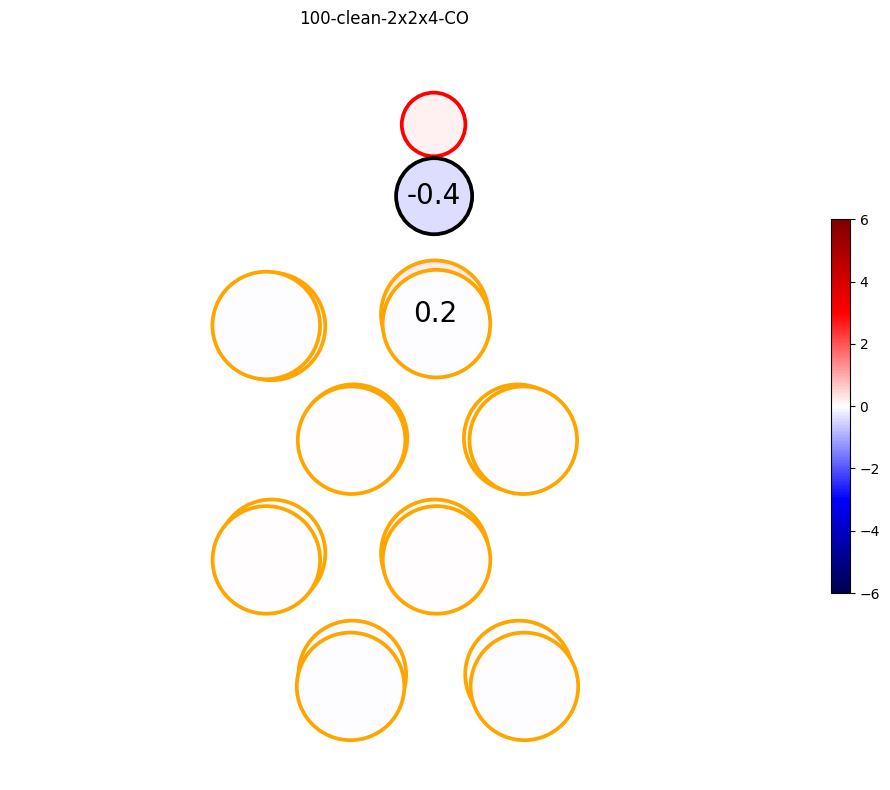

100-clean-2x2x4-OH-complete
-14.75290719
0.9998829999999967
18 18 18 18 18 18


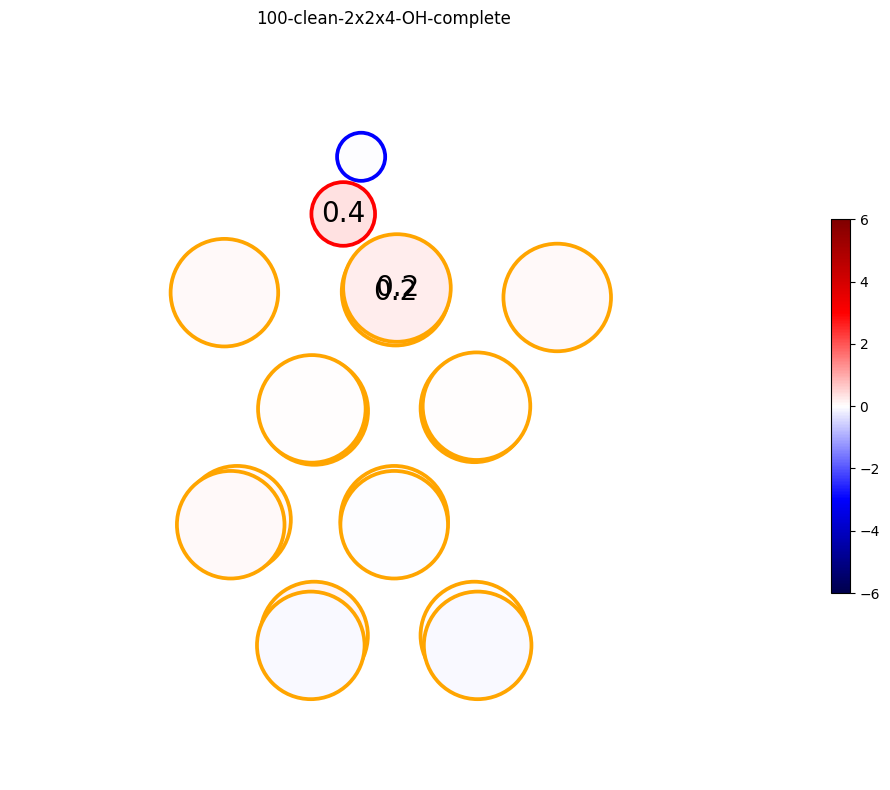

100-clean-2x2x4-OH-incomplete
-14.75290719
nan
18 18 18 18 18 18


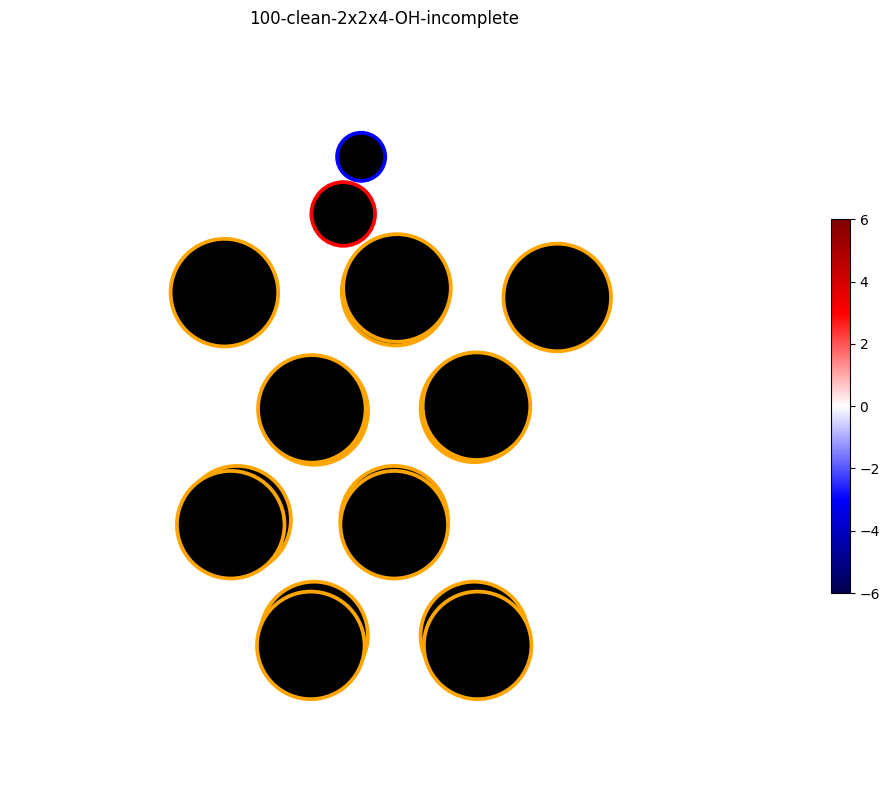

100-clean-2x2x4-O
-10.6821089
1.9998659999999981
17 17 17 17 17 17


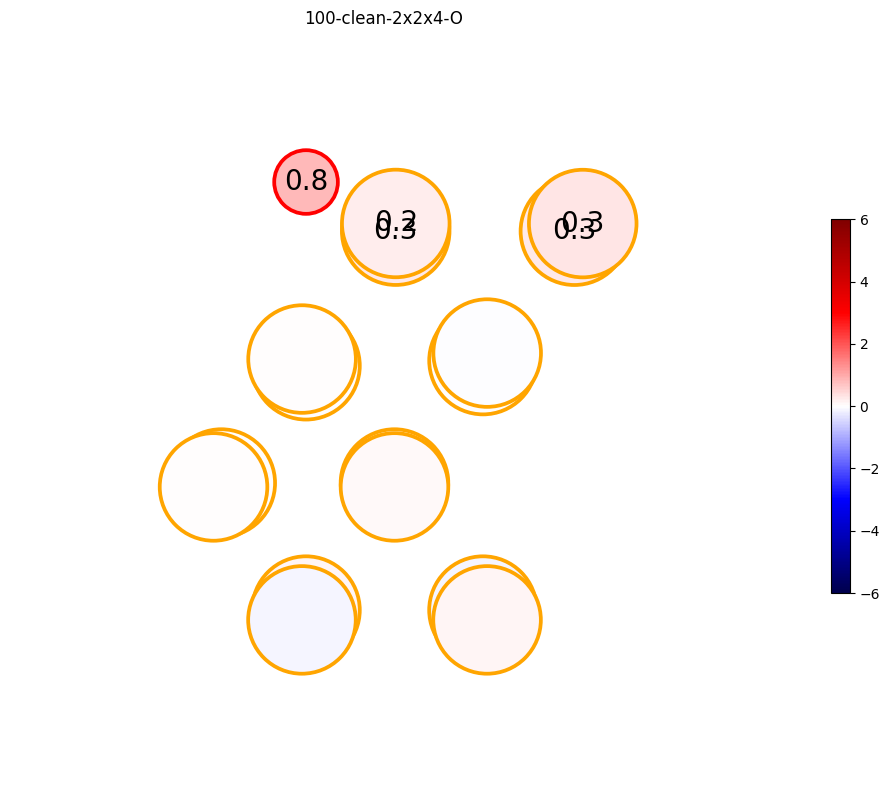

100-clean-2x2x4-H
-8.96830931
-1.0001260000000025
17 17 17 17 17 17


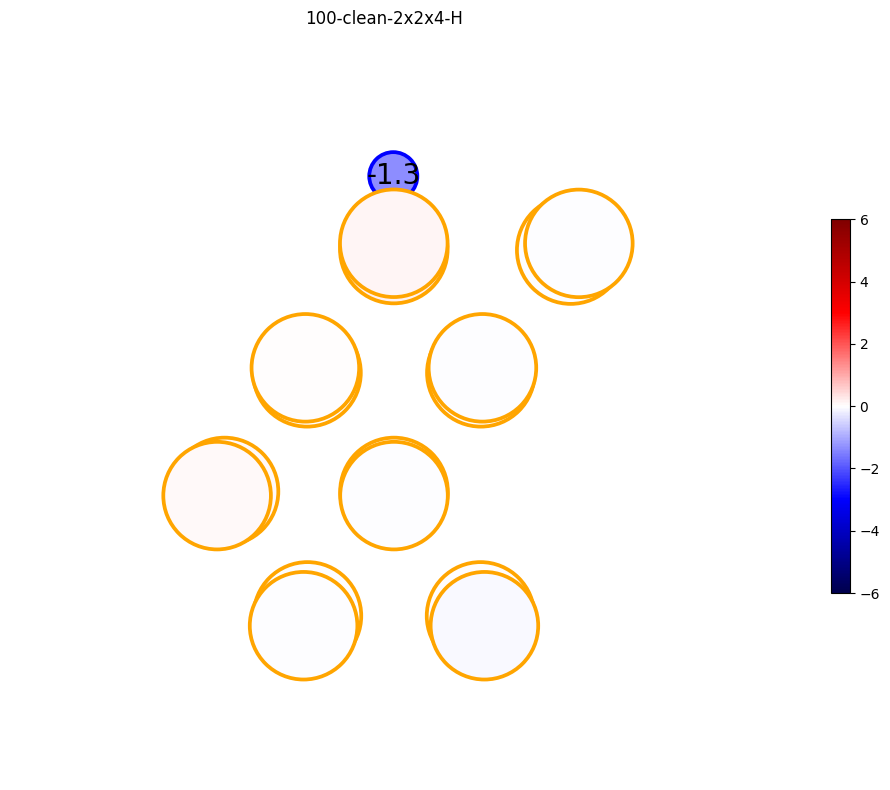

100-clean-2x2x4
-5.51042804
-0.00017899999999748673
16 16 16 16 16 16


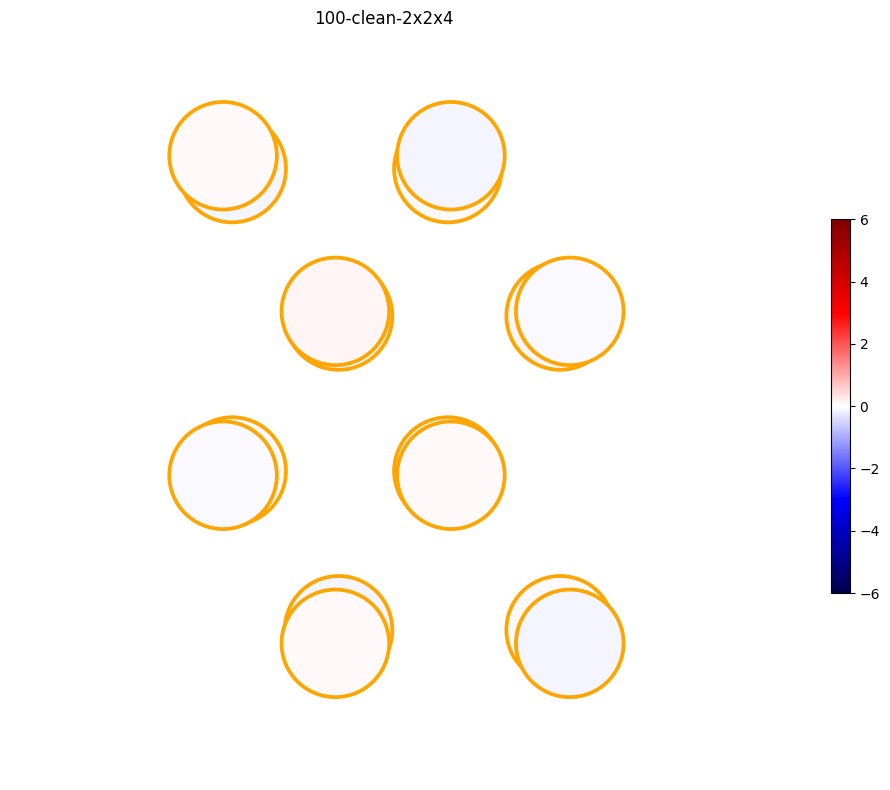

In [34]:
# Here is one solution how you can plot the bader change on the structure with different edge colours and 'atomic' radii for every element
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

coldic = {'Cu':'orange', 'Ni':'lime', 'Zn':'grey', 'Ga':'brown', 'C':'black', 'O':'red', 'H':'blue', 'K':'purple', 'N': 'darkgreen'}
raddic = {'K':3000, 'Cu':1000, 'Ni':1000, 'Zn':1000, 'Ga':1000, 'C':500, 'O':350, 'H':200, 'N': 350}


def D3plot(x,y,z,values,title, elev=0, azim=120, roll=0, s=400, lw=1.25, edgecolor='black', font=10, labels=True):
    # setup the normalization and the colormap
    normalize = mcolors.Normalize(vmin=-6, vmax=6)
    colormap = cm.seismic
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(projection='3d',title=title)
    ax.scatter(x,y,z, c=colormap(list(map(normalize, values))), s = s, alpha=1, linewidth=lw, edgecolor=edgecolor)
    if labels:
        for i in np.arange(0, len(values)):
            i = int(i)
            if np.abs(values[i])>0.2:
                ax.text(x[i],y[i], z[i], round(values[i],1), ha="center" ,va='center', fontsize=font)
    ax.view_init(elev=elev, azim=azim, roll=roll)
    ax.view_init
    # setup the colorbar
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(values)
    plt.colorbar(scalarmappaple, shrink=0.5, ax=ax)
    ax.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout()#rect=[0, 0,1, 1])
    #plt.savefig('images/Chargeplot/'+title+'.svg', bbox_inches='tight')
    plt.show()

for i in Cu_slabs[Cu_slabs.Name.str.contains('100-clean-2x2x4')].sort_values('E').index:
    print(i)
    a = Cu_slabs.loc[i].CONTCAR
    print(Cu_slabs.loc[i].E)
    c = Cu_slabs_atomsindex.loc[i]
    s = a.get_chemical_symbols()
    edgecolor= [coldic[i] for i in s]
    radii= [raddic[i]*6 for i in s]
    z = a.get_positions()[:, 2]
    y = a.get_positions()[:, 1]
    x = a.get_positions()[:, 0]
    Bader_change = c.Bader_change.to_list()
    print(c.Bader_change.to_numpy().sum())
    Bader_change = Bader_change
    print(len(Bader_change), len(radii), len(y), len(z), len(s), len(c))
    
    
    #The perspective can be changed with elev, azim and roll
    #label=False turns the labesl off. font changes the labels size
    D3plot(x, y, z, Bader_change,i, elev=0, azim=0, roll=0, lw=2.7, s=radii, edgecolor=edgecolor, labels=True, font=20)


### Generalized coordination number

In [35]:
from ase.neighborlist import neighbor_list

def get_GCN(row, cutoff=3):
    struc = row['struc']
    i = neighbor_list('i',struc,cutoff=cutoff)
    unique, counts = np.unique(i, return_counts=True)
    coords = dict(zip(unique, counts))
    j = neighbor_list('j',struc,cutoff=cutoff)
    neighbourcoord = map(lambda x : j[i==x], unique)
    gcn = [sum([coords[d] for d in m])/12 for m in neighbourcoord]
    gcn = list(map(round, gcn, [3]*len(counts)))
    return gcn

In [36]:
def GCN(Frame, AtomsFrameIndex):
    gcn_tables = Frame.apply(get_GCN, axis=1)
    gcn_column = [i for m in gcn_tables.to_list() for i in m]
    if len(AtomsFrameIndex.index) == len(gcn_column):
        AtomsFrameIndex['GCN'] = gcn_column
        return AtomsFrameIndex['GCN']
    else:
        print('Number of atoms in struc column ('+str(len(AtomsFrameIndex.index))+') and ACF.dat ('+str(len(gcn_column))+') files do not match.')



In [37]:
GCN(Cu_slabs, Cu_slabs_atomsindex)


100-clean-2x2x4                0      6.667
                               1      6.667
                               2      6.667
                               3      6.667
                               4     10.667
                                      ...  
100-clean-2x2x4-OH-incomplete  13     7.583
                               14     7.833
                               15     7.833
                               16     3.417
                               17     2.083
Name: GCN, Length: 104, dtype: float64